In [44]:
import os
import csv
import random
import numpy as np
import matplotlib.pyplot as plt

In [45]:
# Choose parameters to load the model
experiment = "stability_margin_T"
# Choose the dataset
dataset = "majority"  # "imdb" or "majority" or "listops"
# Choose between T and s_A variation for sweeping
sweep_param = "sA"  # Choose T or sA

if dataset == "imdb":
    if sweep_param == "sA":
        T_values = [500]               
        s_A_values = [-0.1, -0.08, -0.06, -0.04, -0.02, 0.0, 0.02, 0.04, 0.06, 0.08, 0.1]
    elif sweep_param == "T":
        T_values = [300, 350, 400, 450, 500, 550]
        s_A_values = [0.1]      
    else: raise ValueError("Invalid sweep_param, choose T or sA")            
    N = 4                               # Number of states per channel
    d = 16                              # Number of channels
    m = 2500                            # Number of samples
    m_test = 2500                       # Number of test samples
    ep = 10                             # Number of epochs
    bs = 256                            # Batch size
    lr = 1e-2                           # Learning rate
    wd = 1e-5                           # Weight decay
    delta = True                        # Use delta (discretization) flag
    seed = 1                            # Random seed
elif dataset == "majority":
    if sweep_param == "sA":
        T_values = [250]               
        s_A_values = [-0.1, -0.08, -0.06, -0.04, -0.02, 0.0, 0.02, 0.04, 0.06, 0.08, 0.1] 
    elif sweep_param == "T":
        T_values = [50, 100, 150, 200, 250, 300]
        s_A_values = [0.1]
    else: raise ValueError("Invalid sweep_param, choose T or sA")            
    N = 4                               # Number of states per channel
    d = 4                               # Number of channels
    m = 1000                            # Number of samples
    m_test = 1000                       # Number of test samples
    ep = 10                             # Number of epochs
    bs = 64                             # Batch size
    lr = 1e-2                           # Learning rate
    wd = 1e-5                           # Weight decay
    delta = True                        # Use delta (discretization) flag
    seed = 0                            # Random seed
elif dataset == "listops":
    if sweep_param == "sA":
        T_values = [300]               
        s_A_values = [-0.1, -0.08, -0.06, -0.04, -0.02, 0.0, 0.02, 0.04, 0.06, 0.08, 0.1] 
    elif sweep_param == "T":
        T_values =  [100, 200, 300, 400, 500, 600]
        s_A_values = [0.1]
    else: raise ValueError("Invalid sweep_param, choose T or sA")            
    N = 4                               # Number of states per channel
    d = 16                              # Number of channels
    m = 1000                            # Number of samples
    m_test = 1000                       # Number of test samples
    ep = 10                             # Number of epochs
    bs = 64                             # Batch size
    lr = 1e-2                           # Learning rate
    wd = 1e-5                           # Weight decay
    delta = True                        # Use input dependent delta
    T_var = 5                           # Variance of the sequence length
    seed = 0                            # Random seed
else:
    raise ValueError("Invalid dataset")

# Set the seed
np.random.seed(seed)
random.seed(seed)

# Read all log files in the directory
repo_dir = "." # assuming you are in the repository root
path = f"{repo_dir}/results/{experiment}/{dataset}/epochs"
log_paths_all = []
for file in os.listdir(path):
    log_paths_all.append(os.path.join(path, file))

# Generate file names wrt the chosen parameters
file_names = []
for T in T_values:
    for s_A in s_A_values:
        # Generate file names to get from the models directory
        file_names.append(f"log_T_{T}_sA_{s_A}_N_{N}_d_{d}_m_{m}_ep_{ep}_bs_{bs}_lr_{lr}_wd_{wd}_delta_{delta}_seed_{seed}")

# Load the logs using the generated file names in the order of the file names
logs = []
for file_name in file_names:
    for log_path in log_paths_all:
        if file_name in log_path:
            with open(log_path, 'r') as f:
                reader = csv.reader(f)
                log = list(reader)
                logs.append(log)
                print(f"Loaded {log_path}")

Loaded ./results/stability_margin_T/majority/epochs/log_T_250_sA_-0.1_N_4_d_4_m_1000_ep_10_bs_64_lr_0.01_wd_1e-05_delta_True_seed_0.csv
Loaded ./results/stability_margin_T/majority/epochs/log_T_250_sA_-0.08_N_4_d_4_m_1000_ep_10_bs_64_lr_0.01_wd_1e-05_delta_True_seed_0.csv
Loaded ./results/stability_margin_T/majority/epochs/log_T_250_sA_-0.06_N_4_d_4_m_1000_ep_10_bs_64_lr_0.01_wd_1e-05_delta_True_seed_0.csv
Loaded ./results/stability_margin_T/majority/epochs/log_T_250_sA_-0.04_N_4_d_4_m_1000_ep_10_bs_64_lr_0.01_wd_1e-05_delta_True_seed_0.csv
Loaded ./results/stability_margin_T/majority/epochs/log_T_250_sA_-0.02_N_4_d_4_m_1000_ep_10_bs_64_lr_0.01_wd_1e-05_delta_True_seed_0.csv
Loaded ./results/stability_margin_T/majority/epochs/log_T_250_sA_0.0_N_4_d_4_m_1000_ep_10_bs_64_lr_0.01_wd_1e-05_delta_True_seed_0.csv
Loaded ./results/stability_margin_T/majority/epochs/log_T_250_sA_0.02_N_4_d_4_m_1000_ep_10_bs_64_lr_0.01_wd_1e-05_delta_True_seed_0.csv
Loaded ./results/stability_margin_T/majority/

In [46]:
# Plot stability margins:
# For each file, read the s_A values for all epochs and store them in a list
s_A_values_all = []
for log in logs:
    s_A_values = []
    for row in log:
        # For the first row its the headers, so get the index of s_A and skip the row
        if row[0] == "epoch":
            s_A_index = row.index("s_A")
            continue
        else:
            s_A_values.append(float(row[s_A_index]))
    s_A_values_all.append(s_A_values)
    
# Order the s_A values wrt the first elements of the list only


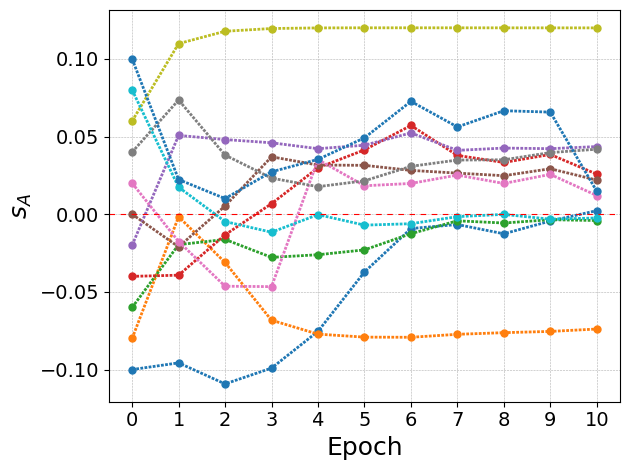

In [47]:
# Plot all stability marginson the same plot with the legent being initial stability margin
lineWidth = 2
dashWidth = 1.2
gridWidth = 0.4
markerSize = 10
labelFontSize = 18
axisFontSize = 14
legendFontSize = 12

plt.figure()
for i, s_A_values in enumerate(s_A_values_all):
    if sweep_param == "T":
        plt.plot(s_A_values, label=f"{T_values[i]:.0f}", marker='.', linestyle='--', dashes=(1, 0.5), markersize=markerSize, linewidth=lineWidth)
        legend = plt.legend(title=r"T", bbox_to_anchor=(1, 0.73), loc='upper right', fontsize=legendFontSize)
    elif sweep_param == "sA":
        plt.plot(s_A_values, marker='.', linestyle='--', dashes=(1, 0.5), markersize=markerSize, linewidth=lineWidth)
    else:
        raise ValueError("Invalid sweep_param, choose T or sA")
plt.axhline(0, color='red', linestyle='--', linewidth=0.8, dashes=(5, 5))
plt.xlabel("Epoch", fontsize=labelFontSize)
plt.ylabel(r"$s_A$", fontsize=labelFontSize)
plt.xticks(range(0, len(s_A_values)), fontsize=axisFontSize)
plt.yticks(fontsize=axisFontSize)
# plt.title("Stability Margin vs Epoch")
plt.margins(0.05)
plt.grid(True, which='both', linestyle='--', linewidth=gridWidth)
plt.tight_layout()
# plt.ylim(-0.2, 0.2)
plt.savefig(f'results/{experiment}/{dataset}/sweep_{sweep_param}.pdf', dpi=300, bbox_inches='tight')


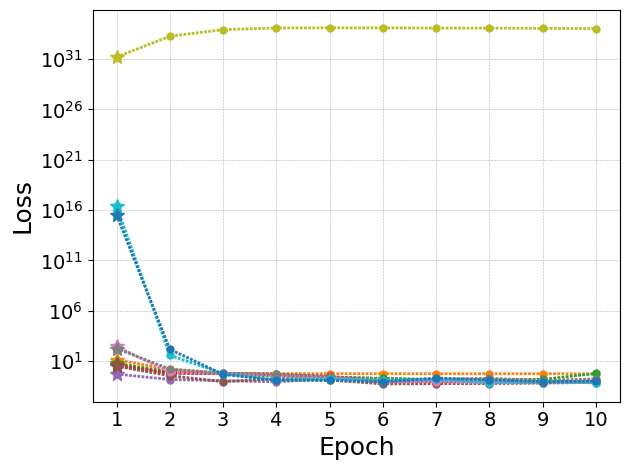

In [48]:
# Plot the epoch loss for each T in a log plot
# For each file, read the loss values for all epochs and store them in a list
loss_values_all = []
for log in logs:
    loss_values = []
    for row in log:
        # For the first row its the headers, so get the index of loss and skip the row
        if row[0] == "epoch":
            loss_index = row.index("Loss")
            continue
        else:
            loss_values.append(float(row[loss_index]))
    loss_values_all.append(loss_values)
    
# Order the loss values wrt the first elements of the list only
# Plot all loss values on the same plot with the legend being initial stability margin
plt.figure

for i, loss_values in enumerate(loss_values_all):
    color = f"C{i}"
    if sweep_param == "T":
        plt.plot(range(1, len(loss_values)), loss_values[1:], label=f"{T_values[i]:.0f}", marker='.', linestyle='--', dashes=(1, 0.5), markersize=markerSize, linewidth=lineWidth)
        legend = plt.legend(title=r"T", bbox_to_anchor=(1, 0.59), loc='upper right', fontsize=legendFontSize)
    elif sweep_param == "sA":
        plt.plot(range(1, len(loss_values)), loss_values[1:], marker='.', linestyle='--', dashes=(1, 0.5), markersize=markerSize, linewidth=lineWidth, color=color)
    else:
        raise ValueError("Invalid sweep_param, choose T or sA")
    # Place a '*' marker at the first visible point, i.e., epoch 1
    plt.plot(1, loss_values[1], marker='*', markersize=markerSize, color=color, linestyle='None')

plt.xlabel("Epoch", fontsize=18)   
plt.ylabel("Loss", fontsize=18)
plt.yscale("log")
plt.xticks(range(1, len(loss_values)), fontsize=axisFontSize)
plt.yticks(fontsize=axisFontSize)
plt.margins(0.05)
plt.grid(True, which='both', linestyle='--', linewidth=gridWidth)
plt.tight_layout()
plt.savefig(f'results/{experiment}/{dataset}/loss_{sweep_param}.pdf', dpi=300, bbox_inches='tight')